In [1]:

from astropy import units as u
from astropy import time

import numpy as np


from poliastro import iod
from poliastro.bodies import Earth, Mars, Sun
from poliastro.ephem import Ephem
from poliastro.maneuver import Maneuver
from poliastro.twobody import Orbit
from poliastro.util import time_range
from poliastro.plotting import OrbitPlotter3D, StaticOrbitPlotter
from poliastro.earth.atmosphere import COESA76

import math

#atm imports
from poliastro.core.elements import rv2coe
from poliastro.core.perturbations import atmospheric_drag_exponential, third_body, J2_perturbation

#
from poliastro.core.propagation import func_twobody
from poliastro.twobody.propagation import propagate, cowell
from poliastro.ephem import build_ephem_interpolant
from astropy.time import Time, TimeDelta
from poliastro.constants import rho0_earth, H0_earth


# More info: https://plotly.com/python/renderers/
import plotly.io as pio

pio.renderers.default = "plotly_mimetype+notebook_connected"

from astropy.coordinates import solar_system_ephemeris


solar_system_ephemeris.set("jpl")

c:\Users\jacki\miniforge-pypy3\envs\python_3.9\lib\site-packages\poliastro\core\_jit.py:29: UserWarning: Could not import numba package. All poliastro functions will work properly but the CPU intensive algorithms will be slow. Consider installing numba to boost performance.
  warnings.warn(


<ScienceState solar_system_ephemeris: 'jpl'>

In [2]:
# More info: https://plotly.com/python/renderers/
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"
R = Earth.R.to(u.km).value
k = Earth.k.to(u.km ** 3 / u.s ** 2).value

orbit = Orbit.circular(Earth, 250 * u.km, epoch=Time(0.0, format="jd", scale="tdb"))

# parameters of a body
C_D = 2.2  # dimentionless (any value would do)
A_over_m = ((np.pi / 4.0) * (u.m ** 2) / (100 * u.kg)).to_value(
    u.km ** 2 / u.kg
)  # km^2/kg
B = C_D * A_over_m

# parameters of the atmosphere
rho0 = rho0_earth.to(u.kg / u.km ** 3).value  # kg/km^3
H0 = H0_earth.to(u.km).value
print(H0)
tofs = TimeDelta(np.linspace(0 * u.h, 100000 * u.s, num=2000))



8.5


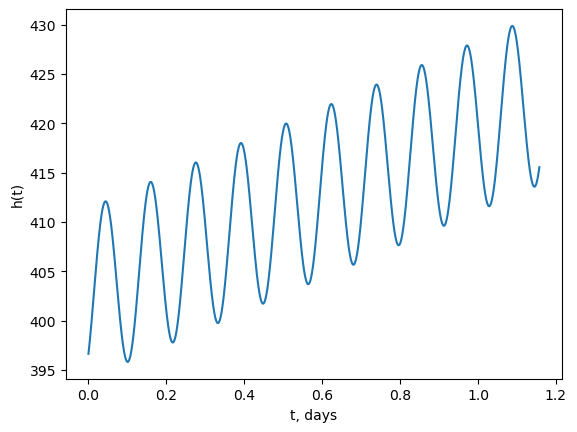

In [3]:
import numpy as np
from astropy import units as u
from astropy import time

from poliastro.bodies import Earth
from poliastro.twobody import Orbit
from poliastro.twobody.propagation import propagate
from poliastro.core.perturbations import atmospheric_drag_exponential
from poliastro.examples import iss
import matplotlib.pyplot as plt
from poliastro.twobody.propagation import cowell
from poliastro.plotting import OrbitPlotter3D
from poliastro.util import norm
import plotly.io as pio
pio.renderers.default = "notebook_connected"

accel = 2e-7
def constant_accel_factory(accel):
    def constant_accel(t0, u, k):
        v = u[3:]
        norm_v = (v[0]**2 + v[1]**2 + v[2]**2)**.5
        return accel * v / norm_v

    return constant_accel
times = np.linspace(0, 10 * iss.period, 2000)
times
positions = propagate(
    iss,
    time.TimeDelta(times),
    method=cowell,
    rtol=1e-11,
    ad=constant_accel_factory(accel),
)

tofs = TimeDelta(np.linspace(0 * u.h, 100000 * u.s, num=2000))
plt.ylabel("h(t)")
plt.xlabel("t, days")
plt.plot(tofs.value, positions.norm() - Earth.R)




8.5
0.0005002501250625312
450.0000001136723 km


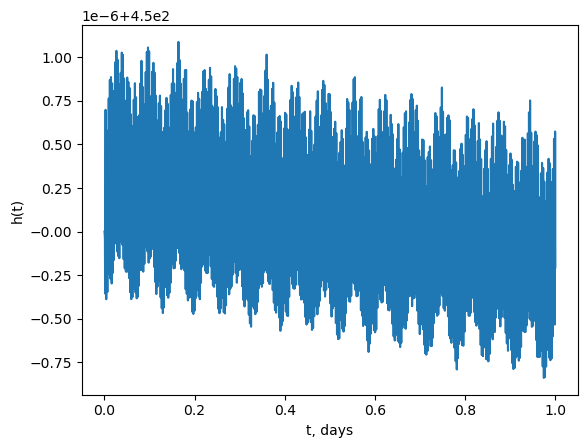

In [4]:



R = Earth.R.to(u.km).value
k = Earth.k.to(u.km ** 3 / u.s ** 2).value

orbit = Orbit.circular(Earth, 450 * u.km, epoch=Time(0.0, format="jd", scale="tdb"))

# parameters of a body
C_D = 2.2  # dimentionless (any value would do)
A_over_m = ((np.pi / 4.0) * (u.m ** 2) / (100 * u.kg)).to_value(u.km ** 2 / u.kg)  # km^2/kg
B = C_D * A_over_m

# parameters of the atmosphere
rho0 = rho0_earth.to(u.kg / u.km ** 3).value  # kg/km^3
H0 = H0_earth.to(u.km).value
print(H0)
#propogation paremeters
prop_time = 1*u.day
prop_total = 2000

times = np.linspace(0, prop_time, prop_total)
print(time.TimeDelta(times)[1])
positions = propagate(
    orbit,
    time.TimeDelta(times),
    method=cowell,
    rtol=1e-10,
    ad=atmospheric_drag_exponential,
    R=R,
    C_D=C_D,
    A_over_m=A_over_m,
    H0=H0,
    rho0=rho0,
)
print(positions[4].norm()-Earth.R)

tofs = TimeDelta(np.linspace(0 * u.h, prop_time, num=prop_total))
plt.ylabel("h(t)")
plt.xlabel("t, days")
plt.plot(tofs.value, positions.norm() - Earth.R)



In [5]:
accel = 2e-7
def atm_clever(accel,pos):
    def constant_accel(t0, u,k):
        v = u[3:]
        norm_v = (v[0]**2 + v[1]**2 + v[2]**2)**.5
        #print(t0)
        if(t0>86300):
            t0 = 86300
        H = norm(state[:3])

        print(H)
        return accel * v  / (norm_v )

    return constant_accel


orbit = orbit.circular(Earth, alt = 130*u.km)

prop_time = 1*u.day
prop_total = int(prop_time.to('second').value)

times = np.linspace(0, prop_time, prop_total)

positions = propagate(
    orbit,
    time.TimeDelta(times),
    method=cowell,
    rtol=1e-11,
    ad=atm_clever(accel,positions.norm()-Earth.R),
)

rr = propagate(
    orbit,
    tofs,
    method=cowell,
    ad=atmospheric_drag_exponential,
    R=R,
    C_D=C_D,
    A_over_m=A_over_m,
    H0=H0,
    rho0=rho0,
)

tofs = TimeDelta(np.linspace(0 * u.h, prop_time, num=prop_total))
plt.ylabel("h(t)")
plt.xlabel("t, days")
plt.plot(tofs.value, positions.norm() - Earth.R)


NameError: name 'state' is not defined

In [22]:
#vostok spacecraft little test
accel = 2e-7
atmosphere = COESA76()


orbit = orbit.circular(Earth, alt = 130*u.km)
print(orbit.r_p.to(u.km)-Earth.R)

orbit.ecc = 0.01
print(orbit.r_p.to(u.km)-Earth.R)

def atm_simple():
    def constant_accel(t0, state,k):
        v = state[3:]
        norm_v = (v[0]**2 + v[1]**2 + v[2]**2)**.5
        p = state[:3]
        alt = 10e-4*(np.linalg.norm(state)*10e2-Earth.R.value)*u.km#alt in km, not sure what these dumbass 1/10th of a metre units are
        pressure = atmosphere.properties(alt)[1]
        #print(pressure.value)
        if(t0>86300):
            t0 = 86300
        #alt = (pos[int(t0)])
        return (-pressure.value*10e1)*accel * v / (norm_v )
        #need to figure out why 0 vector causes freakouts
        

    return constant_accel


prop_time = 1*u.day
prop_total = int(prop_time.to('second').value)

times = np.linspace(0, prop_time, prop_total)

positions = propagate(
    orbit,
    time.TimeDelta(times),
    method=cowell,
    rtol=1e-11,
    ad=atm_simple(),
)


tofs = TimeDelta(np.linspace(0 * u.h, prop_time, num=prop_total))
plt.ylabel("h(t)")
plt.xlabel("t, days")
plt.plot(tofs.value, positions.norm() - Earth.R)

130.0 km
130.0 km


KeyboardInterrupt: 